## Mapping the Definitions and Methodological Approaches of Pattern Completion: A Scoping Review Across Human and Rodent Memory Experiments

1. Theoretical definition synthesis

In [26]:
#Import the necessary libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [1]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
import re
import string
# NEW: Import the WordNetLemmatizer from NLTK
from nltk.stem import WordNetLemmatizer

# Basic stopword list (you can expand this)
custom_stopwords = {
    'the', 'and', 'a', 'an', 'of', 'in', 'on', 'to', 'with', 'is', 'was',
    'for', 'that', 'this', 'from', 'as', 'by', 'are', 'at', 'be', 'or', 'it',
    'its', 'which', 'can', 'such', 'if', 'then', 'into', 'may'
}

# NEW: Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    """
    Cleans text by:
    - Lowercasing
    - Removing punctuation
    - Normalizing whitespace
    - Lemmatizing nouns (to handle plurals)
    - Removing basic stopwords
    """
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # normalize whitespace
    tokens = text.split()

    # NEW: Lemmatize each word, treating it as a noun ('n') to handle plurals
    lemmatized_tokens = [lemmatizer.lemmatize(word, pos='n') for word in tokens]
    
    # Filter stopwords from the lemmatized tokens
    filtered_tokens = [word for word in lemmatized_tokens if word not in custom_stopwords]
    
    return ' '.join(filtered_tokens)


# --- Example Usage ---

# Your original script would have kept "apples" and "oranges"
original_text = "These apples and oranges are for the pies."

cleaned_text = clean_text(original_text)

print(f"Original Text: '{original_text}'")
print(f"Cleaned Text:  '{cleaned_text}'")

# Example Output:
# Original Text: 'These apples and oranges are for the pies.'
# Cleaned Text:  'these apple orange pie'

Original Text: 'These apples and oranges are for the pies.'
Cleaned Text:  'these apple orange pie'


In [5]:
#load the human dataset and prepare the format

human_data = pd.read_excel('Review_Tables.xlsx', sheet_name='Human_study')
human_data.head(5)

#keep only Title and Theoretical definition columns
human_data = human_data[['Title', 'Theoretical definition']]
#rename column for easier access
human_data = human_data.rename(columns={'Theoretical definition': 'Definition'})
human_data['Type'] = 'Human_Study'

#load the rodent dataset and prepare the format
rodent_data = pd.read_excel('Review_Tables.xlsx', sheet_name='Rodent_study')
#keep only Title and Theoretical definition columns
rodent_data = rodent_data[['Title', 'Theoretical definition']]
#rename column for easier access
rodent_data = rodent_data.rename(columns={'Theoretical definition': 'Definition'})
rodent_data['Type'] = 'Rodent_Study'

#merge the two datasets
all_data = pd.concat([human_data, rodent_data], ignore_index=True)

#drop title duplicates
all_data = all_data.drop_duplicates(subset=['Title'])



In [6]:
#clean the text in the Definition column with lambda function
all_data['Cleaned_Definition'] = all_data['Definition'].apply(lambda x: clean_text(str(x)))

# STEP 2: Tokenize the cleaned text
all_data['tokens'] = all_data['Cleaned_Definition'].astype(str).apply(lambda x: x.split())




In [7]:
from collections import Counter

# Group tokens by study type
human_tokens = all_data[all_data['Type'] == 'Human_Study']['tokens']
rodent_tokens = all_data[all_data['Type'] == 'Rodent_Study']['tokens']

# Flatten tokens into a single list
human_all = [token for tokens in human_tokens for token in tokens]
rodent_all = [token for tokens in rodent_tokens for token in tokens]

# Get top N tokens
human_freq = Counter(human_all).most_common(50)
rodent_freq = Counter(rodent_all).most_common(50)



In [9]:
#extract a dataframe with both human and rodent frequencies containing all tokens
human_df = pd.DataFrame(human_freq, columns=['Token', 'Frequency'])
rodent_df = pd.DataFrame(rodent_freq, columns=['Token', 'Frequency'])
# Add a column to indicate the type of study
human_df['Type'] = 'Human_Study'
rodent_df['Type'] = 'Rodent_Study'
# Concatenate the two dataframes
token_df = pd.concat([human_df, rodent_df], ignore_index=True)
#export the token_df to a csv file
token_df.to_csv('All_Tokens.csv', index=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17236\152295912.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="crest")


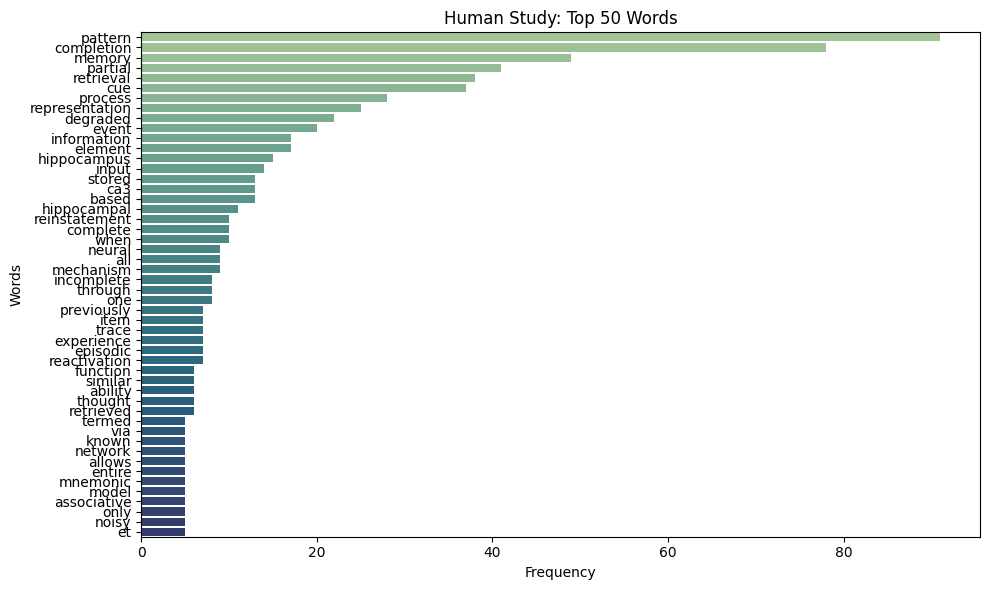

C:\Users\Admin\AppData\Local\Temp\ipykernel_17236\152295912.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="crest")


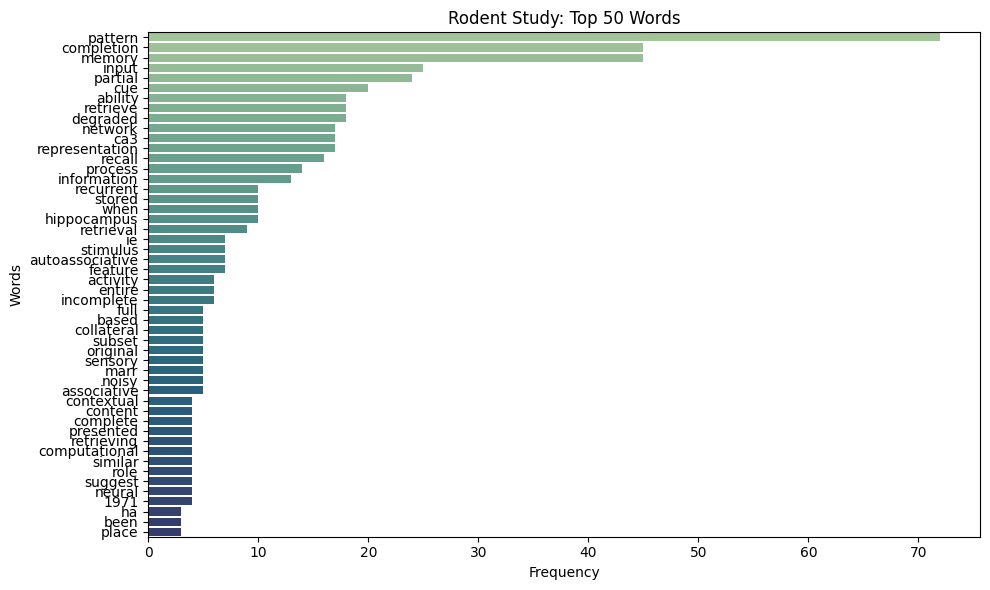

In [10]:


def plot_bar(freq_list, title):
    words, counts = zip(*freq_list)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words), palette="crest")
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_bar(human_freq, "Human Study: Top 50 Words")
plot_bar(rodent_freq, "Rodent Study: Top 50 Words")




Semantic Embedding of Definitions 

In [21]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\cmudict.zip.
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gazetteers.zip.
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\genesis.zip.
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gutenberg.zip.
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nl

True

In [27]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

# You might need to download these first
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # --- ADD THIS CHECK ---
    # If the value is not a string (e.g., it's a NaN float), return an empty string.
    if not isinstance(text, str):
        return ""
    # ----------------------

    text = text.lower()  # Lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)
    # Lemmatize and remove stopwords
    lemmas = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(lemmas)


all_data['Cleaned_Definition'] = all_data['Definition'].apply(clean_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Top bigrams in Human literature: [('pattern completion', np.int64(77)), ('partial cue', np.int64(15)), ('partial degraded', np.int64(15)), ('completion process', np.int64(11)), ('degraded cue', np.int64(8)), ('memory representation', np.int64(7)), ('degraded input', np.int64(7)), ('previously stored', np.int64(6)), ('retrieval cue', np.int64(6)), ('hippocampal pattern', np.int64(6))]
Top bigrams in Rodent literature: [('pattern completion', np.int64(47)), ('ability retrieve', np.int64(12)), ('partial degraded', np.int64(12)), ('completion ability', np.int64(11)), ('input pattern', np.int64(8)), ('degraded input', np.int64(6)), ('recurrent collateral', np.int64(5)), ('partial cue', np.int64(5)), ('retrieve stored', np.int64(5)), ('memory representation', np.int64(5))]


C:\Users\Admin\AppData\Local\Temp\ipykernel_17236\342300422.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="crest")


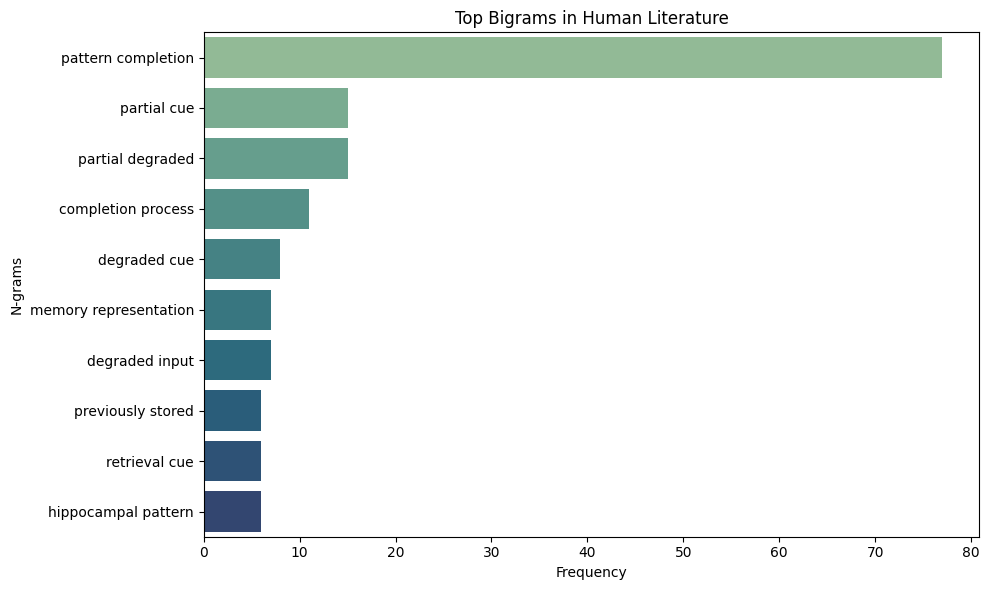

C:\Users\Admin\AppData\Local\Temp\ipykernel_17236\342300422.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="crest")


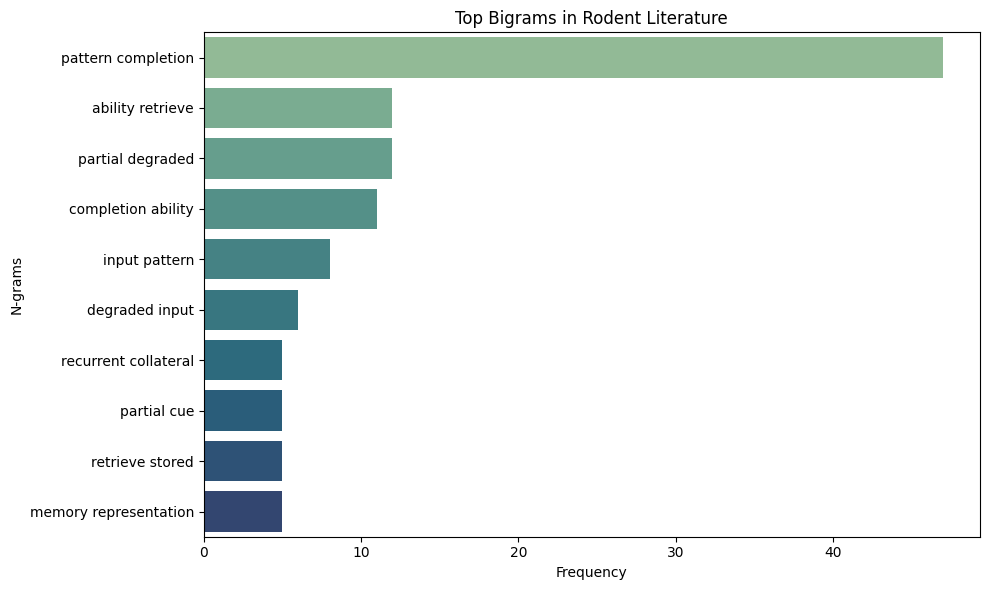

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, ngram_range=(1, 1), n=10):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# For Human literature
human_corpus = all_data[all_data['Type'] == 'Human_Study']['Cleaned_Definition']
print("Top bigrams in Human literature:", get_top_ngrams(human_corpus, ngram_range=(2, 2)))

# For Rodent literature
rodent_corpus = all_data[all_data['Type'] == 'Rodent_Study']['Cleaned_Definition']
print("Top bigrams in Rodent literature:", get_top_ngrams(rodent_corpus, ngram_range=(2, 2)))


#plot the top bigrams for both human and rodent studies
def plot_top_ngrams(ngrams, title):
    words, counts = zip(*ngrams)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words), palette="crest")
    plt.xlabel("Frequency")
    plt.ylabel("N-grams")
    plt.title(title)
    plt.tight_layout()
    plt.show()
plot_top_ngrams(get_top_ngrams(human_corpus, ngram_range=(2, 2)), "Top Bigrams in Human Literature")
plot_top_ngrams(get_top_ngrams(rodent_corpus, ngram_range=(2, 2)), "Top Bigrams in Rodent Literature")